# Finding out the number of nets for which qNML equals NML

These networks are exactly those whose connected components are tournaments. For $n$ nodes, how many such networks are there?

We start by generating the integer partitions two find out the different ways n labelled nodes can be partitioned into parts with different size-profiles.

In [1]:
from sympy.combinatorics.partitions import IntegerPartition

In [2]:
def gen_iparts(n):
    p = IntegerPartition([n])
    while len(p.partition)<n:
        yield p.partition
        p = p.prev_lex()
    yield p.partition

In [3]:
list(gen_iparts(4))

[[4], [3, 1], [2, 2], [2, 1, 1], [1, 1, 1, 1]]

Each of these partition size profiles corresponds to many different networks. Or well, the last one corresponds just to an empty network. 

We count number of networks for one such partition size profile (and then later sum these counts up). 
For any such partition profile $(p_1,\ldots,p_k)$ we can (think we can) count the ways we can pick the nodes to different parts and then order each part. This leads to the prodict $n\choose p_1$$p_1$!${n-p_1}\choose p_2$$p_2!$${n-p_1-p2}\choose p_3$$p3!$$\ldots$${n-\sum_{j=1}^{k-1}p_j}\choose p_k$$p_k!$. However, the order of different parts of the same size does not matter, so for all groups of parts having the same size, we have to divide the prodict above by the factorial of the size of such group. Notice also, that the product above telescopes, leaving us a formula for OEIS sequence A000262 as described by Thomas Wieder:

With $p(n) =$ the number of integer partitions of $n$, 
     $d(i)$ = the number of different parts of the $i$-th partition of $n$, $m(i,j) =$ multiplicity of the $j$-th part of the $i$-th partition of $n$,  one has: 

$$
a(n) = \sum_{i=1}^{p(n)} \frac{n!}{\prod_{j=1}^{d(i)} m(i,j)!}.
$$

In [4]:
from scipy.special import comb
from scipy.misc import factorial
import numpy as np
from itertools import groupby

In [5]:
def gen_ptcounts(pts):
    n = sum(pts)
    for p_size, ps in groupby(pts):
        ps = list(ps)
        terms = [comb(n-i*p,p,exact=True)*factorial(p,exact=True)
                 for i,p in enumerate(ps)]
        yield np.product(terms,dtype=int)/factorial(len(ps),exact=True)
        n -= sum(ps)

def nof_nets4pts(pts):
        return np.prod(list(gen_ptcounts(pts)),dtype=int)

In [18]:
def nof_NML_nets(n,verbose=False):
    iparts = list(gen_iparts(n))
    pts_n_trms = [(pts,nof_nets4pts(pts)) for pts in iparts]
    if verbose: 
        for (pts,trm) in pts_n_trms:
            print (pts, trm)
    return sum(trms for pts,trms in pts_n_trms)

In [23]:
for n in range(1,9):
    print(nof_NML_nets(n,verbose=True))
    print()

[1] 1
1

[2] 2
[1, 1] 1
3

[3] 6
[2, 1] 6
[1, 1, 1] 1
13

[4] 24
[3, 1] 24
[2, 2] 12
[2, 1, 1] 12
[1, 1, 1, 1] 1
73

[5] 120
[4, 1] 120
[3, 2] 120
[3, 1, 1] 60
[2, 2, 1] 60
[2, 1, 1, 1] 20
[1, 1, 1, 1, 1] 1
501

[6] 720
[5, 1] 720
[4, 2] 720
[4, 1, 1] 360
[3, 3] 360
[3, 2, 1] 720
[3, 1, 1, 1] 120
[2, 2, 2] 120
[2, 2, 1, 1] 180
[2, 1, 1, 1, 1] 30
[1, 1, 1, 1, 1, 1] 1
4051

[7] 5040
[6, 1] 5040
[5, 2] 5040
[5, 1, 1] 2520
[4, 3] 5040
[4, 2, 1] 5040
[4, 1, 1, 1] 840
[3, 3, 1] 2520
[3, 2, 2] 2520
[3, 2, 1, 1] 2520
[3, 1, 1, 1, 1] 210
[2, 2, 2, 1] 840
[2, 2, 1, 1, 1] 420
[2, 1, 1, 1, 1, 1] 42
[1, 1, 1, 1, 1, 1, 1] 1
37633

[8] 40320
[7, 1] 40320
[6, 2] 40320
[6, 1, 1] 20160
[5, 3] 40320
[5, 2, 1] 40320
[5, 1, 1, 1] 6720
[4, 4] 20160
[4, 3, 1] 40320
[4, 2, 2] 20160
[4, 2, 1, 1] 20160
[4, 1, 1, 1, 1] 1680
[3, 3, 2] 20160
[3, 3, 1, 1] 10080
[3, 2, 2, 1] 20160
[3, 2, 1, 1, 1] 6720
[3, 1, 1, 1, 1, 1] 336
[2, 2, 2, 2] 1680
[2, 2, 2, 1, 1] 3360
[2, 2, 1, 1, 1, 1] 840
[2, 1, 1, 1, 1, 1, 1] 56
[1, 1,

In [24]:
def b(N):
    B=[]
    B.append(1)
    for n in range(1,N+1):
        B.append(0)
        for k in range(1,n+1):
            B[-1]+=(-1)**(k+1)*comb(n,k)*2**(k*(n-k))*B[n-k]
    return B[-1]


In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


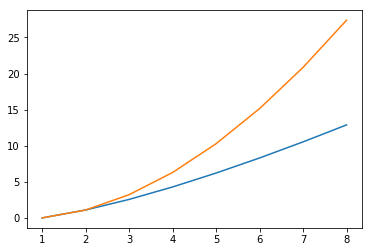

In [29]:
ns=range(1,9)
plot(ns, [log(nof_NML_nets(n)) for n in ns])
plot(ns, [log(b(n)) for n in ns])

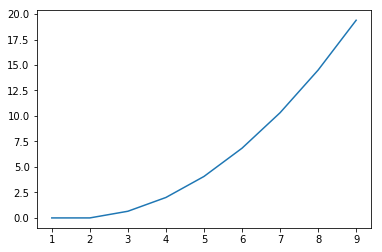

In [30]:
ns=range(1,10)
plot(ns, [-log(nof_NML_nets(n)/b(n)) for n in ns])

In [37]:
for n in range(1,19):
    print(nof_NML_nets(n))

1
3
13
73
501
4051
37633
394353
4596553
58941091
824073141
12470162233
202976401213
3535017524403
65573803186921
1290434218669921
26846616451246353
588633468315403843
